In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## 1) 載入資料集

In [16]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2) 切割訓練集與測試集

In [17]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


## 隨機森林(分類器)
隨機森林其實就是進階版的決策樹。隨機森林是使用 Bagging + 隨機特徵的技術所產生出來的 Ensemble learning 演算法。

Parameters:
- n_estimators: 森林中樹木的數量，預設=100。
- max_features: 劃分時考慮的最大特徵數，預設auto。
- criterion: 亂度的評估標準，gini/entropy。預設為gini。
- max_depth: 樹的最大深度。
- splitter: 特徵劃分點選擇標準，best/random。預設為best。
- random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
- min_samples_split: 至少有多少資料才能再分
- min_samples_leaf: 分完至少有多少資料才能分

Attributes:
- feature_importances_: 查詢模型特徵的重要程度。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。
- predict_proba: 預測每個類別的機率值。
- get_depth: 取得樹的深度。

In [18]:
from sklearn.ensemble import RandomForestClassifier

# 建立 Random Forest Classifier 模型
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
# 使用訓練資料訓練模型
randomForestModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = randomForestModel.predict(X_train)

## 使用Score評估模型

In [19]:
# 預測成功的比例
print('訓練集: ',randomForestModel.score(X_train,y_train))
print('測試集: ',randomForestModel.score(X_test,y_test))

訓練集:  1.0
測試集:  0.8888888888888888


## 特徵重要程度

In [20]:
print('特徵重要程度: ',randomForestModel.feature_importances_)

特徵重要程度:  [0.09864249 0.01363871 0.44211602 0.44560278]


## 真實分類

In [26]:
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
df_test['Species'] = y_test
pred = randomForestModel.predict(X_test)
df_test['Predict'] = pred

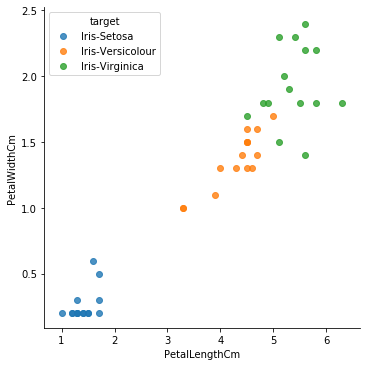

In [33]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", hue='Species', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

## 隨機森林 (測試集)預測結果

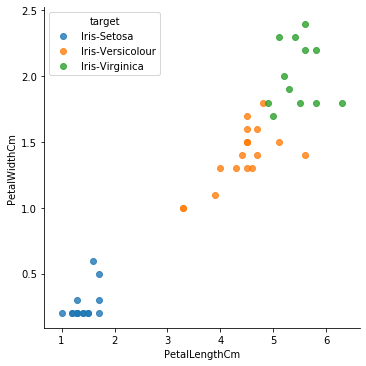

In [35]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=df_test, hue="Predict", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

## 繪製森林中的每一棵樹

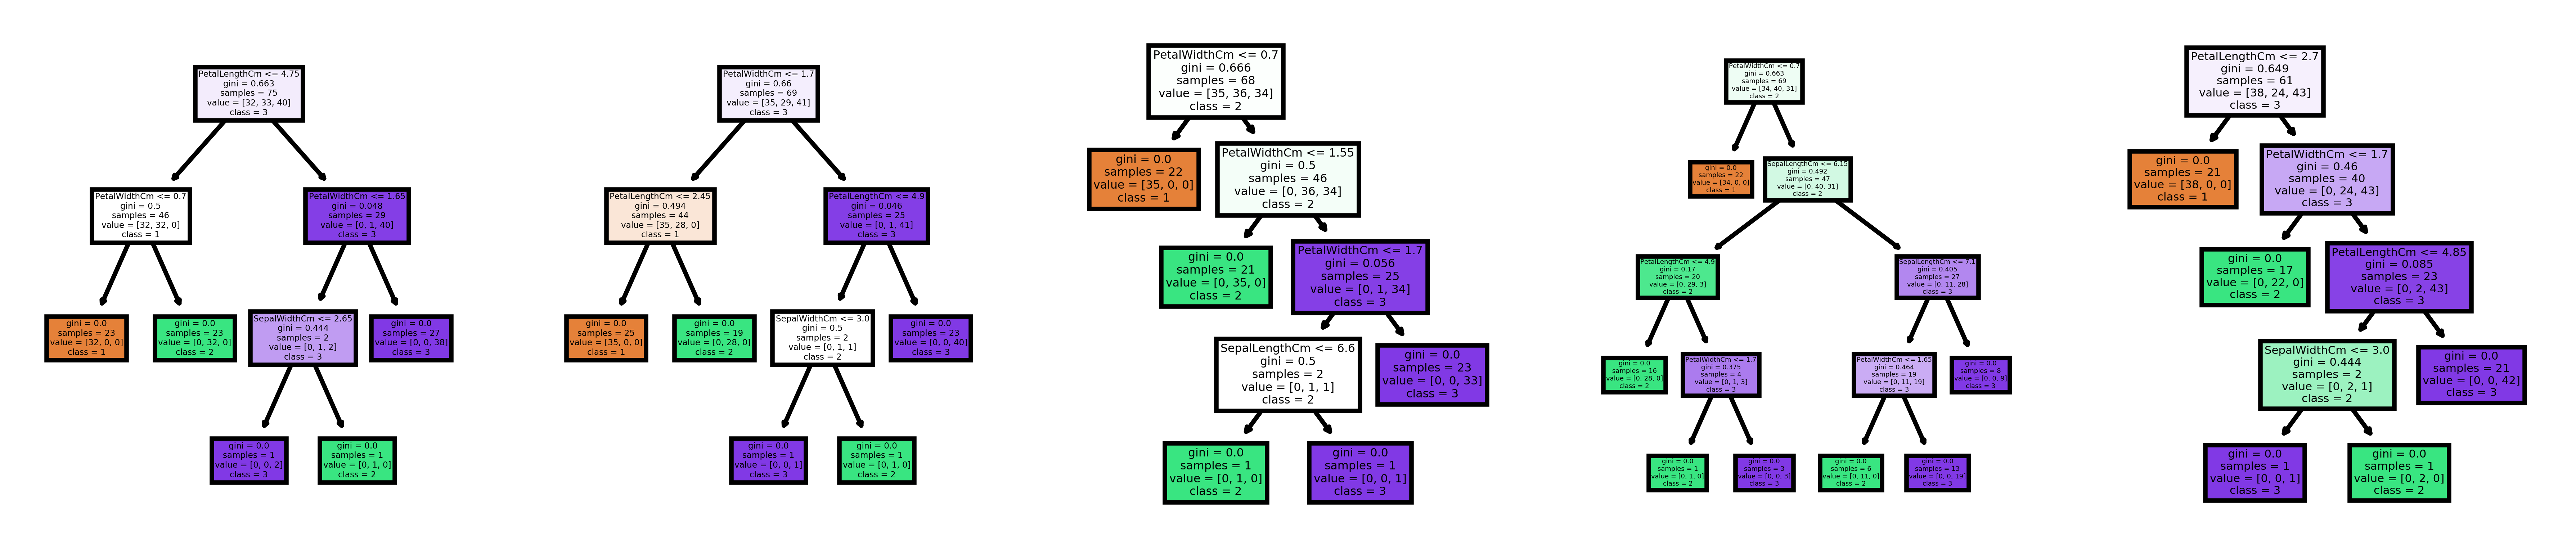

In [30]:
from sklearn import tree
featureName=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
className=['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
# 繪製前五棵樹
for index in range(0, 5):
    tree.plot_tree(randomForestModel.estimators_[index],
                   feature_names = featureName, 
                   class_names=className,
                   filled = True,
                   ax = axes[index]);